### Import Required libraries

In [75]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [77]:
# drop index
df = df.drop("instant", axis=1)

In [78]:
# as we only concerned with total bookings we can drop the casual and registered columns
df = df.drop(["casual","registered"], axis=1)
df.shape


(730, 13)

In [79]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 74.2+ KB


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualize the data(EDA Analysis)

##### Visualising Numeric Variables


<Figure size 1440x864 with 0 Axes>

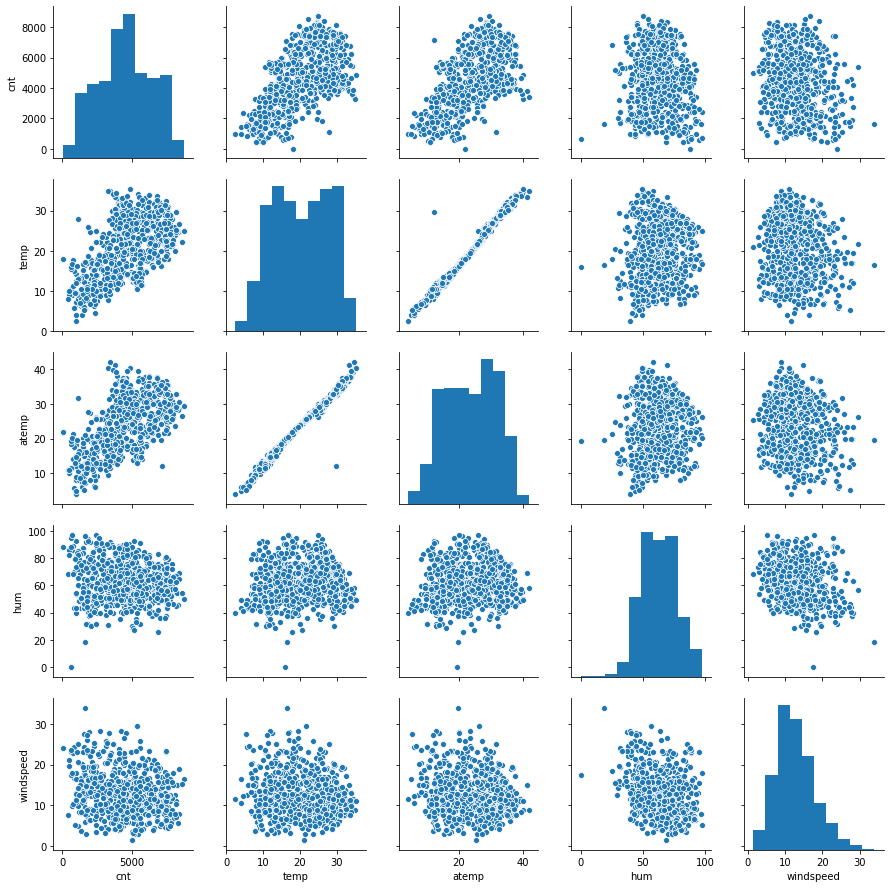

In [81]:
plt.figure(figsize=(20, 12))
cols = ["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(df[cols])
plt.show()

## BoxPlot for categorical Variables

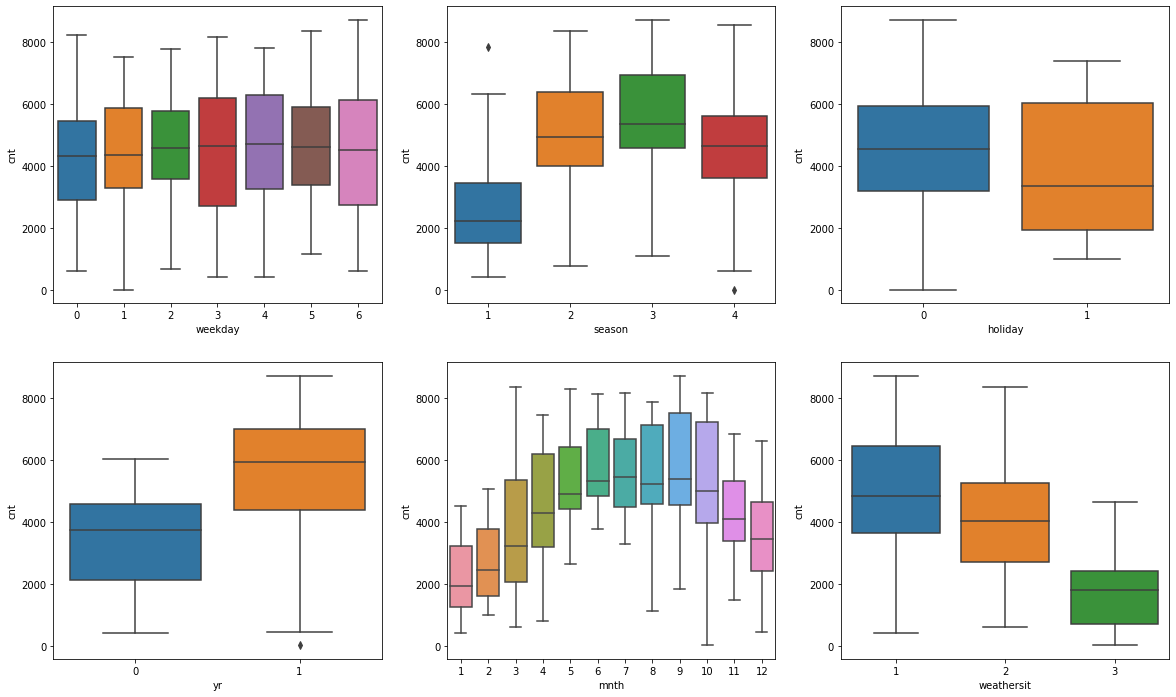

In [82]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)



plt.show()

In [83]:
# Correlation matrix

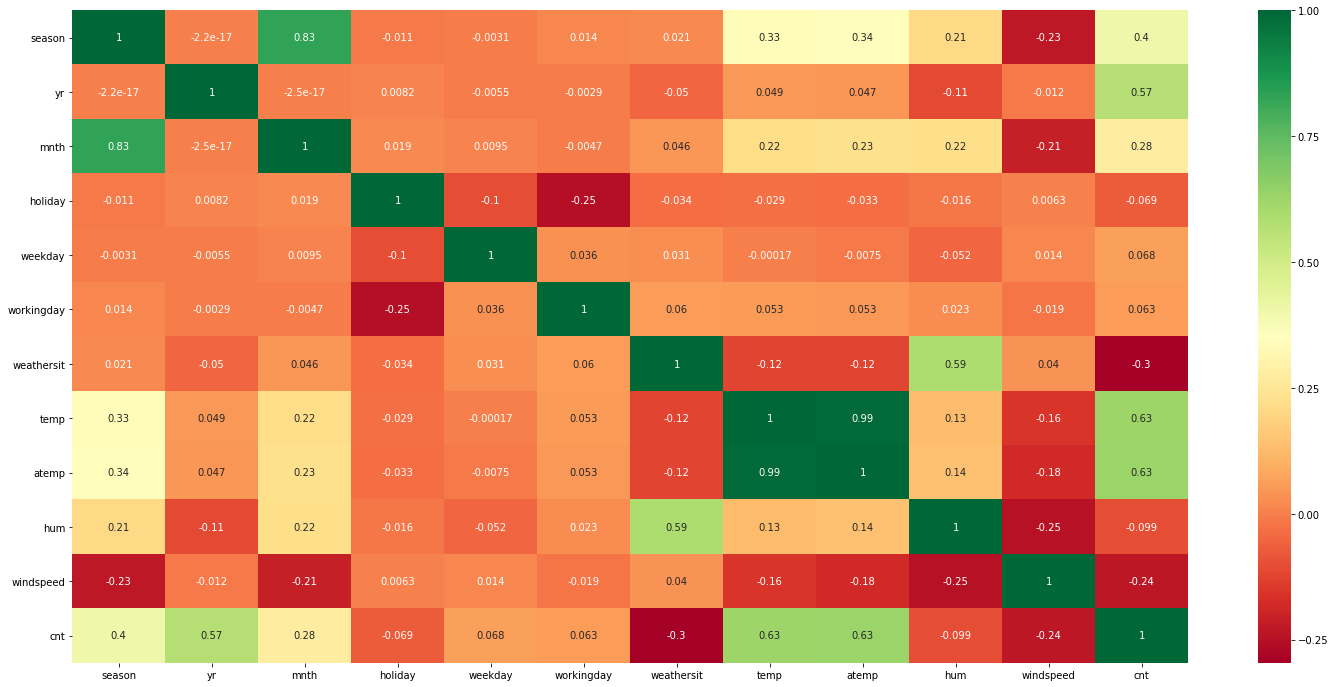

In [84]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [85]:
## as temp and atemp are perfectly aligned with corr .99, we can remove 1 of them. Lets remove temp

In [86]:
df = df.drop("temp", axis=1)

In [87]:

df = df.drop("dteday", axis=1)

In [88]:
# Mapping Categorical Variables
df["weathersit"] = df.weathersit.map({1:"Clear",2:"Mist + Cloudy", 3: "Light Snow",4: "Snow + Fog"})
df["mnth"] = df.mnth.map({1:"Jan", 2:"Feb", 3:"Mar",4: "Apr", 5:"May",6:"Jun", 7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [89]:
df["season"] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [90]:
df["weekday"] = df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

In [91]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


## Data Preparation - Dummy variables 


In [92]:
mon = pd.get_dummies(df.mnth, drop_first=True)
wd = pd.get_dummies(df.weekday, drop_first= True)
ssn = pd.get_dummies(df.season, drop_first = True)
ws = pd.get_dummies(df.weathersit, drop_first = True)

In [93]:
df = pd.concat([df,mon,wd,ssn,ws], axis= 1 )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,...,1,0,0,0,0,1,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,...,0,1,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,1,0,1,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,1,0,0,0,0


In [94]:
## Drop the above columns as dummy variables are created agianst it.
df = df.drop(["mnth","weekday","season","weathersit"], axis=1)


In [95]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [96]:
df.shape

(730, 29)

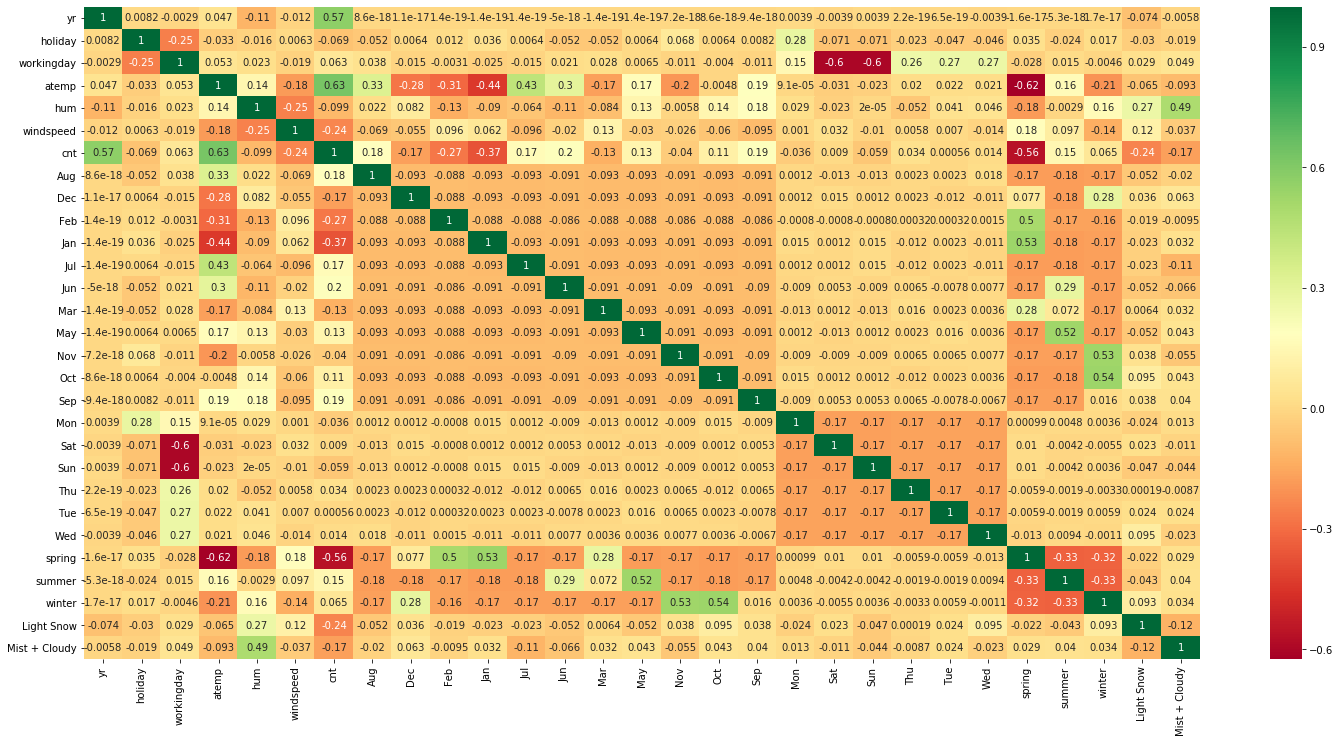

In [97]:
## Printing the correlation matrix to see the correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null int64
Aug              730 non-null uint8
Dec              730 non-null uint8
Feb              730 non-null uint8
Jan              730 non-null uint8
Jul              730 non-null uint8
Jun              730 non-null uint8
Mar              730 non-null uint8
May              730 non-null uint8
Nov              730 non-null uint8
Oct              730 non-null uint8
Sep              730 non-null uint8
Mon              730 non-null uint8
Sat              730 non-null uint8
Sun              730 non-null uint8
Thu              730 non-null uint8
Tue              730 non-null uint8
Wed              730 non-null uint8
spring           730 non-

In [99]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100 )

In [100]:
## Rescaling of Features

In [101]:
scaler = MinMaxScaler()

In [102]:
num_vars = ["atemp","windspeed","hum","cnt"]

In [103]:
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [104]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
atemp,510.0,0.513156,0.212410,0.0,0.332086,0.529718,0.688457,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
Aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.066667,0.249689,0.0,0.000000,0.000000,0.000000,1.0


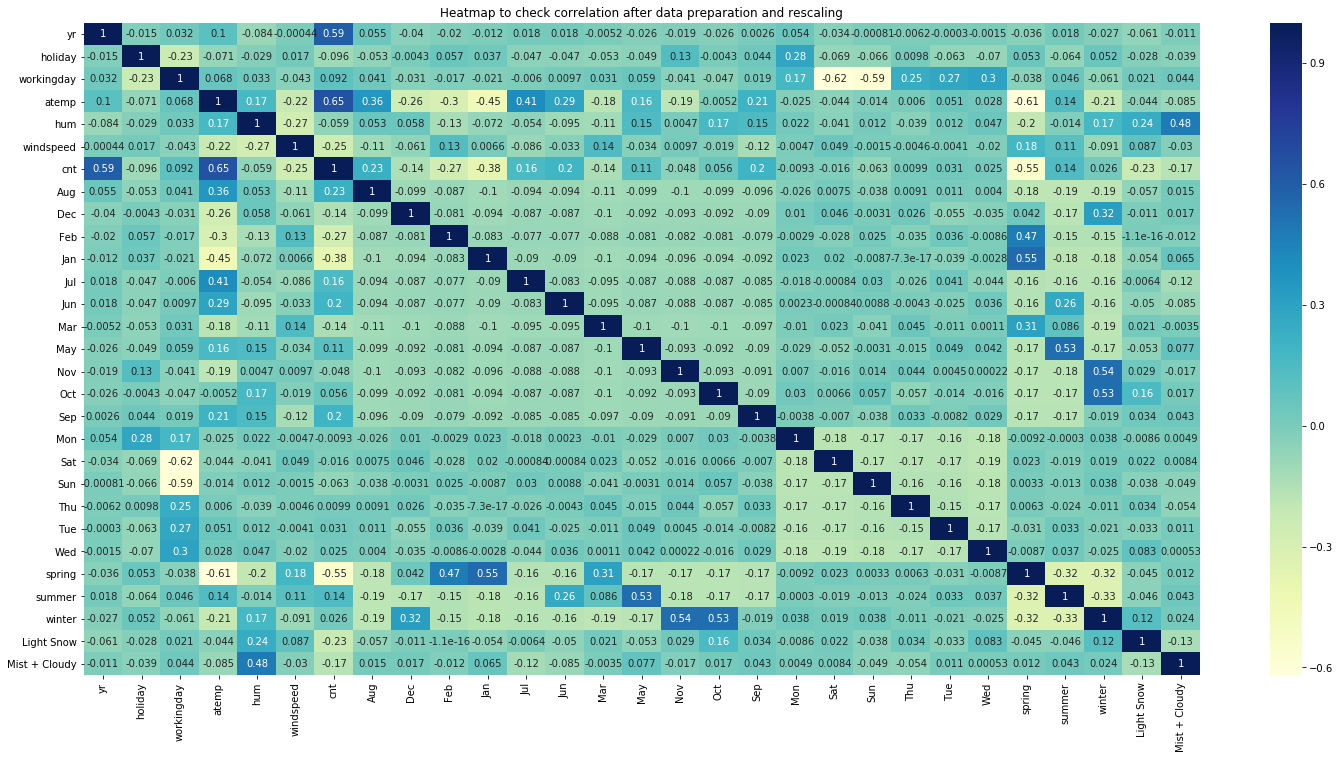

In [105]:
# checking the correlation coefficients to see which variables are highly correlated post data preparation and rescaling
plt.figure(figsize=(25, 12))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap to check correlation after data preparation and rescaling')
plt.show()


###### We can see above in the heatmap that cnt is heavily co related with atemp

Text(0.5, 1.0, 'Correlation B/w atemp vs cnt')

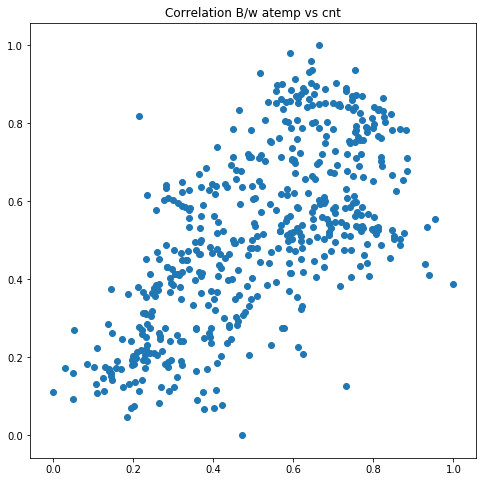

In [106]:
## Pairplot to see the correlation visually
plt.figure(figsize=(8, 8))
plt.scatter(df_train.atemp, df_train.cnt)
plt.title("Correlation B/w atemp vs cnt")

## Step3 Model Training

In [107]:
y_train = df_train.pop('cnt')
X_train = df_train

In [108]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [109]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [110]:
## add constant
X_train_sm = sm.add_constant(df_train.atemp)
#create model
lr = sm.OLS(y_train,X_train_sm)
# fit
lr_model = lr.fit()
#params
lr_model.params

const    0.162201
atemp    0.684584
dtype: float64

In [111]:
## Checking the summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           4.77e-62
Time:                        11:09:36   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.0

R-Squared is .42 means 42% of the varaince in the count quantity is explained by atemp.

In [112]:
# visualising the fitted line

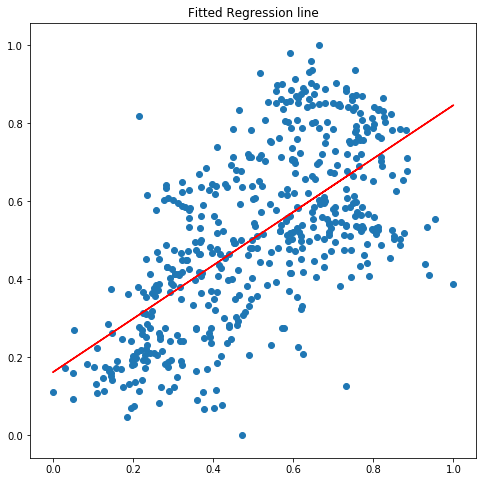

In [113]:
plt.figure(figsize=(8, 8))
plt.scatter(X_train_sm.iloc[:,1],y_train)
plt.plot(X_train_sm.iloc[:,1],0.1622 + 0.6846* X_train_sm.iloc[:,1],'r' )
plt.title("Fitted Regression line")
plt.show()

### 2nd Model with all variables

In [114]:
df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [115]:
X_train_sm  = sm.add_constant(X_train)
#create model 
lr2 = sm.OLS(y_train, X_train_sm)

lr_model2 = lr2.fit()

lr_model2.params

const            0.259367
yr               0.234388
holiday          0.021174
workingday       0.100374
atemp            0.416044
hum             -0.145906
windspeed       -0.168331
Aug              0.041879
Dec             -0.052616
Feb             -0.040366
Jan             -0.073554
Jul             -0.014692
Jun              0.024234
Mar             -0.000344
May              0.036270
Nov             -0.045708
Oct              0.007606
Sep              0.095657
Mon             -0.026284
Sat              0.096108
Sun              0.041711
Thu             -0.013083
Tue             -0.021388
Wed             -0.008192
spring          -0.051922
summer           0.034816
winter           0.101506
Light Snow      -0.253008
Mist + Cloudy   -0.061167
dtype: float64

In [116]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          1.07e-179
Time:                        11:09:36   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2594      0.035      7.397      0.000       0.190       0.328
yr                0.2344      0.008     28.934      0.000       0.218       0.250
holiday           0.0212      0.024      0.882      0.378      -0.026       0.068
workingday        0.1004      0.012      8.176      0.000       0.076       0.124
atemp             0.4160      0.045      9.174      0.000       0.327       0.505
hum              -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed        -0.1683      0.026     -6.488      0.000      -0.219      -0.117
Aug               0.0419      0.033      1.257      0.209      -0.024       0.107
Dec              -0.0526      0.034     -1.560      0.120      -0.119       0.014
Feb              -0.0404      0.033     -1.221      0.223      -0.105       0.025
Jan              -0.0736      0.034     -2.188      0.029      -0.140      -0.007
Jul              -0.0147      0.035     -0.424      0.672      -0.083       0.053
Jun               0.0242      0.024      1.000      0.318      -0.023       0.072
Mar              -0.0003      0.025     -0.014      0.989      -0.049       0.048
May               0.0363      0.021      1.734      0.084      -0.005       0.077
Nov              -0.0457      0.037     -1.249      0.212      -0.118       0.026
Oct               0.0076      0.036      0.210      0.833      -0.063       0.079
Sep               0.0957      0.032      2.984      0.003       0.033       0.159
Mon              -0.0263      0.015     -1.702      0.089      -0.057       0.004
Sat               0.0961      0.014      6.934      0.000       0.069       0.123
Sun               0.0417      0.014      2.964      0.003       0.014       0.069
Thu              -0.0131      0.016     -0.835      0.404      -0.044       0.018
Tue              -0.0214      0.016     -1.368      0.172      -0.052       0.009
Wed              -0.0082      0.015     -0.545      0.586      -0.038       0.021
spring           -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer            0.0348      0.026      1.327      0.185      -0.017       0.086
winter            0.1015      0.028      3.612      0.000       0.046       0.157
Light Snow       -0.2530      0.027     -9.497      0.000      -0.305      -0.201
Mist + Cloudy    -0.0612      0.010     -5.830      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     7.06e+15
================================================================

 R squared is now .850, i.e. 85% variance in the count.

###### Using Recursive Feature Elimination:

In [117]:
len(df.columns)

29

In [118]:
# create the RFE Object 
lm = LinearRegression()
lm.fit(X_train, y_train)

## setting feature selection variables to 12
rfe = RFE(lm, n_features_to_select=15)

##fit
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 6),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [120]:
rfe_features = X_train.columns[rfe.support_]

In [121]:
X_train_rfe = X_train[rfe_features]

In [122]:
## add constant
X_train_rfe = sm.add_constant(X_train_rfe)

# CREATE MODEL
lr_rfe = sm.OLS(y_train, X_train_rfe)
# FIT
lr_model_rfe = lr_rfe.fit()

#Params
lr_model_rfe.params

const            0.220842
yr               0.231144
holiday         -0.051868
workingday       0.043394
atemp            0.516931
hum             -0.161560
windspeed       -0.171085
Aug              0.060616
Feb             -0.027776
Jan             -0.053514
Sep              0.118380
Sat              0.051483
summer           0.087651
winter           0.122576
Light Snow      -0.239156
Mist + Cloudy   -0.057037
dtype: float64

In [123]:
## Model Summary
lr_model_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          8.05e-188
Time:                        11:09:36   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2208      0.032      6.910      0.000       0.158       0.284
yr                0.2311      0.008     28.495      0.000       0.215       0.247
holiday          -0.0519      0.027     -1.900      0.058      -0.106       0.002
workingday        0.0434      0.012      3.710      0.000       0.020       0.066
atemp             0.5169      0.029     18.032      0.000       0.461       0.573
hum              -0.1616      0.038     -4.292      0.000      -0.236      -0.088
windspeed        -0.1711      0.026     -6.622      0.000      -0.222      -0.120
Aug               0.0606      0.016      3.727      0.000       0.029       0.093
Feb              -0.0278      0.020     -1.399      0.162      -0.067       0.011
Jan              -0.0535      0.020     -2.740      0.006      -0.092      -0.015
Sep               0.1184      0.016      7.261      0.000       0.086       0.150
Sat               0.0515      0.015      3.491      0.001       0.023       0.080
summer            0.0877      0.012      7.252      0.000       0.064       0.111
winter            0.1226      0.013      9.467      0.000       0.097       0.148
Light Snow       -0.2392      0.026     -9.062      0.000      -0.291      -0.187
Mist + Cloudy    -0.0570      0.011     -5.430      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       60.174   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.014
Skew:                          -0.595   Prob(JB):                     1.32e-34
Kurtosis:                       5.434   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
## checking the VIF of the model
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [125]:
vif = pd.DataFrame()
X = X_train_rfe ; 
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
4,hum,22.78
3,atemp,13.21
2,workingday,5.15
5,windspeed,4.02
12,winter,2.41
11,summer,2.21
14,Mist + Cloudy,2.19
0,yr,2.06
10,Sat,1.93
8,Jan,1.81


###### ELIMINATE VARIABLES
###### high p value , high vif : drop
###### low p value , low vif : keep variables
###### high low - 1. high p low vif- remove these first and rebuild model and vif recalculate
######            2. low p , high vif - remove these later




In [126]:
## droping workingday because of high VIF 
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,Aug,Feb,Jan,Sep,Sat,summer,winter,Light Snow,Mist + Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,1,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,1,1,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,0,1,0,0,1


In [127]:
X_train_lr_3 = X_train_rfe.drop(["workingday"], axis = 1)

In [128]:
#add constant
X_train_lr3 = sm.add_constant(X_train_lr_3)
# create model
lr_3 = sm.OLS(y_train, X_train_lr3)
# fit
lr_model3 = lr_3.fit()
# summary
lr_model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.98e-186
Time:                        11:09:36   Log-Likelihood:                 504.80
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     495   BIC:                            -916.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2609      0.030      8.566      0.000       0.201       0.321
yr                0.2312      0.008     28.142      0.000       0.215       0.247
holiday          -0.0868      0.026     -3.345      0.001      -0.138      -0.036
atemp             0.5176      0.029     17.827      0.000       0.461       0.575
hum              -0.1701      0.038     -4.468      0.000      -0.245      -0.095
windspeed        -0.1733      0.026     -6.625      0.000      -0.225      -0.122
Aug               0.0629      0.016      3.824      0.000       0.031       0.095
Feb              -0.0291      0.020     -1.447      0.149      -0.069       0.010
Jan              -0.0533      0.020     -2.693      0.007      -0.092      -0.014
Sep               0.1208      0.016      7.322      0.000       0.088       0.153
Sat               0.0155      0.011      1.379      0.168      -0.007       0.038
summer            0.0886      0.012      7.237      0.000       0.065       0.113
winter            0.1216      0.013      9.274      0.000       0.096       0.147
Light Snow       -0.2322      0.027     -8.709      0.000      -0.285      -0.180
Mist + Cloudy    -0.0539      0.011     -5.087      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       60.704   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.657
Skew:                          -0.630   Prob(JB):                     6.39e-32
Kurtosis:                       5.274   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
## calculate VIF 

In [130]:
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_lr3 ; 
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
3,hum,21.65
2,atemp,12.83
4,windspeed,3.87
11,winter,2.40
10,summer,2.20
13,Mist + Cloudy,2.19
0,yr,2.05
7,Jan,1.77
5,Aug,1.59
6,Feb,1.46


In [131]:
## Sat/Feb variables can be dropped due to low VIF & High P-value

In [132]:
X_train_new4 = X_train_lr3.drop(["Sat","Feb"], axis=1)

In [133]:
X_train_lr4 = sm.add_constant(X_train_new4)

lr_4 = sm.OLS(y_train,X_train_lr4)

lr_model4 = lr_4.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          1.83e-187
Time:                        11:09:36   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2502      0.029      8.746      0.000       0.194       0.306
yr                0.2303      0.008     28.012      0.000       0.214       0.246
holiday          -0.0912      0.026     -3.520      0.000      -0.142      -0.040
atemp             0.5348      0.026     20.289      0.000       0.483       0.587
hum              -0.1750      0.038     -4.598      0.000      -0.250      -0.100
windspeed        -0.1724      0.026     -6.579      0.000      -0.224      -0.121
Aug               0.0667      0.016      4.084      0.000       0.035       0.099
Jan              -0.0402      0.018     -2.263      0.024      -0.075      -0.005
Sep               0.1241      0.016      7.566      0.000       0.092       0.156
summer            0.0949      0.011      8.298      0.000       0.072       0.117
winter            0.1306      0.012     11.134      0.000       0.108       0.154
Light Snow       -0.2301      0.027     -8.620      0.000      -0.283      -0.178
Mist + Cloudy    -0.0533      0.011     -5.020      0.000      -0.074      -0.032
==============================================================================
Omnibus:                       53.207   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.194
Skew:                          -0.538   Prob(JB):                     1.97e-29
Kurtosis:                       5.250   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Checking VIF 

In [135]:
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_lr4 ; 
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
3,hum,18.52
2,atemp,11.47
4,windspeed,3.60
11,Mist + Cloudy,2.16
0,yr,2.04
9,winter,2.02
8,summer,1.96
5,Aug,1.56
6,Jan,1.54
7,Sep,1.32


In [136]:
#Droping the hum parameter.
X_train_new5 = X_train_lr4.drop(["hum"], axis=1)

In [137]:
X_train_lr5 = sm.add_constant(X_train_new5)

lr_5 = sm.OLS(y_train,X_train_lr5)

lr_model5 = lr_5.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          3.60e-184
Time:                        11:09:37   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1546      0.020      7.713      0.000       0.115       0.194
yr                0.2344      0.008     28.112      0.000       0.218       0.251
holiday          -0.0926      0.026     -3.503      0.001      -0.145      -0.041
atemp             0.5067      0.026     19.374      0.000       0.455       0.558
windspeed        -0.1410      0.026     -5.465      0.000      -0.192      -0.090
Aug               0.0649      0.017      3.893      0.000       0.032       0.098
Jan              -0.0465      0.018     -2.577      0.010      -0.082      -0.011
Sep               0.1177      0.017      7.061      0.000       0.085       0.151
summer            0.0913      0.012      7.840      0.000       0.068       0.114
winter            0.1193      0.012     10.197      0.000       0.096       0.142
Light Snow       -0.2781      0.025    -11.092      0.000      -0.327      -0.229
Mist + Cloudy    -0.0811      0.009     -9.095      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.082
Skew:                          -0.544   Prob(JB):                     3.09e-27
Kurtosis:                       5.136   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# checking VIF 

In [139]:
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_lr5 ; 
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
2,atemp,4.95
3,windspeed,3.27
0,yr,2.04
7,summer,1.91
4,Aug,1.56
8,winter,1.56
10,Mist + Cloudy,1.54
6,Sep,1.31
5,Jan,1.22
9,Light Snow,1.08


In [140]:
## dropping windspeed - Due to High P value and -ve correlation with cnt

In [141]:
vif

,features,VIF
2,atemp,4.95
3,windspeed,3.27
0,yr,2.04
7,summer,1.91
4,Aug,1.56
8,winter,1.56
10,Mist + Cloudy,1.54
6,Sep,1.31
5,Jan,1.22
9,Light Snow,1.08


In [142]:
X_train_new6 = X_train_lr5.drop(['windspeed'], axis = 1)

In [143]:
X_train_lr6 = sm.add_constant(X_train_new6)

lr_6 = sm.OLS(y_train,X_train_lr6)

lr_model6 = lr_6.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):          4.38e-179
Time:                        11:09:37   Log-Likelihood:                 477.19
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     499   BIC:                            -885.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0886      0.016      5.384      0.000       0.056       0.121
yr                0.2329      0.009     27.171      0.000       0.216       0.250
holiday          -0.0952      0.027     -3.504      0.000      -0.149      -0.042
atemp             0.5405      0.026     20.679      0.000       0.489       0.592
Aug               0.0689      0.017      4.026      0.000       0.035       0.103
Jan              -0.0330      0.018     -1.794      0.073      -0.069       0.003
Sep               0.1247      0.017      7.289      0.000       0.091       0.158
summer            0.0888      0.012      7.425      0.000       0.065       0.112
winter            0.1298      0.012     10.933      0.000       0.106       0.153
Light Snow       -0.2905      0.026    -11.312      0.000      -0.341      -0.240
Mist + Cloudy    -0.0798      0.009     -8.703      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       60.540   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.133
Skew:                          -0.613   Prob(JB):                     2.51e-33
Kurtosis:                       5.358   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
## Checking the VIF
X_train_lr6 = X_train_lr6.drop(['const'], axis = 1)
vif = pd.DataFrame()
X = X_train_lr6 ; 
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,features,VIF
2,atemp,3.92
0,yr,2.00
6,summer,1.85
3,Aug,1.55
7,winter,1.52
9,Mist + Cloudy,1.52
5,Sep,1.30
4,Jan,1.14
8,Light Snow,1.06
1,holiday,1.03


Selected This model as the final model:

1)  Our model selection depends on several factor such as the p-value,VIF and the R-squared value. 
    The p-value provides input on the significance of the variables, 
    the VIF about the correaltion between the participating variables and the 
    R-squared value gives us an indication about the strength of the model. 
    This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2) The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

3) The VIF should be generally <5 and we have achieved that condition with all the variables.

4) The R-squared value achieved is 82.1% which suggests a high correlation between the dependent variable (cnt) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie cnt.



## Step4: Residual Analysis


In [146]:
X_train_lr6 = sm.add_constant(X_train_lr6)

X_train_lr6

,const,yr,holiday,atemp,Aug,Jan,Sep,summer,winter,Light Snow,Mist + Cloudy
576,1.0,1,0,0.766351,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0,0,0,0,0,0,1
728,1.0,1,0,0.200348,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0,0,0,1,0,0,1
111,1.0,0,0,0.318819,0,0,0,1,0,0,1
580,1.0,1,0,0.882350,1,0,0,0,0,0,0
500,1.0,1,0,0.678508,0,0,0,1,0,0,0
479,1.0,1,0,0.513565,0,0,0,1,0,0,0
472,1.0,1,0,0.496135,0,0,0,1,0,0,1
455,1.0,1,0,0.443956,0,0,0,1,0,0,1


In [147]:
# calulating Y_train_pred for residual Analysis

In [148]:
y_train_pred = lr_model6.predict(X_train_lr6)

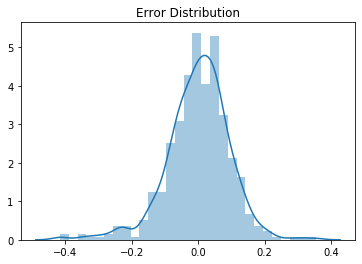

In [149]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title("Error Distribution")
plt.show()


In [150]:
### Performing MinMax Scaling on test set
num_vars

['atemp', 'windspeed', 'hum', 'cnt']

In [151]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [152]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Builing the test model 

In [153]:
y_test = df_test.pop('cnt')
X_test = df_test

In [154]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [155]:
X_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0,0,1,0.795343,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [157]:
#print feature variables
X_train_lr6.columns

Index(['const', 'yr', 'holiday', 'atemp', 'Aug', 'Jan', 'Sep', 'summer',
       'winter', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [158]:
## dropping constant
X_train_lr6.drop(columns="const", inplace = True)


In [159]:
X_test_new = X_test[X_train_lr6.columns]

#add constant
X_test_new = sm.add_constant(X_test_new)

In [161]:
# making predictions
y_pred = lr_model6.predict(X_test_new)



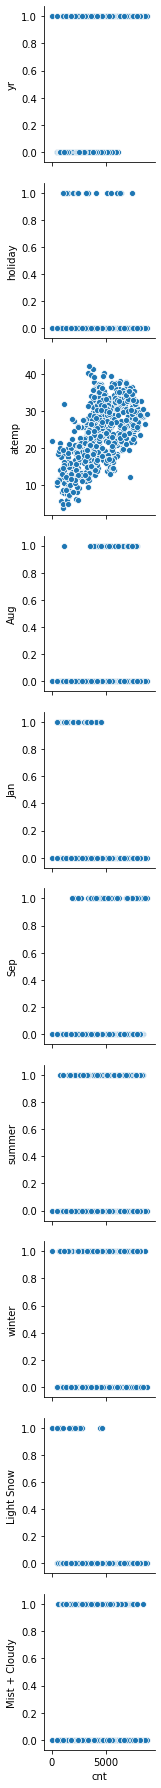

<Figure size 1728x864 with 0 Axes>

In [162]:
sns.pairplot(df,y_vars=X_train_lr6.columns, x_vars="cnt")
plt.figure(figsize = (24,12))
plt.show()

#### Above we can validate the linear regression assumptions
#### 1. Independent variable actual temperature has a linear relationship with the dependent variable cnt
#### 2. Every varibale in the model has the VIF<5 which ensures no multi collinearity
#### 3. Errors are normally distributed as observed above.

## STEP 5: Prediction & Evaluation of test data set

In [166]:
# calcuate the r2 score on test 
r2_test = r2_score(y_true=y_test, y_pred = y_pred)
print("R2 score on test set:", r2_test)

R2 score on test set: 0.7978553781501494


In [168]:
# calcuate the r2 score on train 
r2_train = r2_score(y_true=y_train, y_pred = y_train_pred)
print("R2 score on train set:", r2_train)

R2 score on train set: 0.8207172752755334


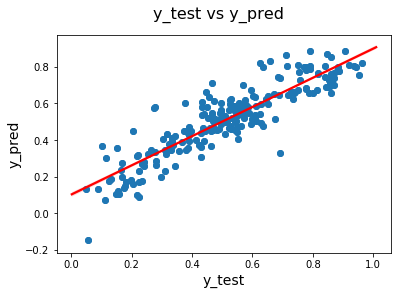

In [169]:
#plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()



In [ ]:


	coef	std err	t	P>|t|	[0.025	0.975]
const	0.0886	0.016	5.384	0.000	0.056	0.121
yr	0.2329	0.009	27.171	0.000	0.216	0.250
holiday	-0.0952	0.027	-3.504	0.000	-0.149	-0.042
atemp	0.5405	0.026	20.679	0.000	0.489	0.592
Aug	0.0689	0.017	4.026	0.000	0.035	0.103
Jan	-0.0330	0.018	-1.794	0.073	-0.069	0.003
Sep	0.1247	0.017	7.289	0.000	0.091	0.158
summer	0.0888	0.012	7.425	0.000	0.065	0.112
winter	0.1298	0.012	10.933	0.000	0.106	0.153
Light Snow	-0.2905	0.026	-11.312	0.000	-0.341	-0.240
Mist + Cloudy	-0.0798	0.009	-8.703	0.000	-0.098	-0.062





###### Equation of the best line :
###### cnt = 0.2329 * yr  - 0.0952*holiday + .5405*atemp + .0689*Aug  - .0330*Jan + .1247*Sep + .0888*summer + .1298*winter - .2905*LightSnow - .0798*MistCloudy + .0886

In [170]:
# calculate the mean squared error 
train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))


In [171]:
print("MSE of training set = ", train_mse)
print("MSE of test set = ", test_mse)

MSE of training set =  0.009011819363226353
MSE of test set =  0.009665399450059496


## Conclusion

1. R-sqaured value of train set is 82.07%  and the test set has the value of 79.78% which signifies the model accurately signifies the variance and it is a good model.

2. Our developed MSE is almost 0 on both train and test data set. We used P values and Vif for selection of the features. RFE is also conducted initially for automated variable selection.

3. We can conclude the bike demands is dependent on the actual temperature and the whether it is workday or not. Moreover demands on the winters are more as compared to summer and spring. It is also observed that there is more demand in the months of Oct and Sept. 

4. Overall these interpretation helps to derive meaningfull insigts in the bike rental demand and behaviour of the people. One of the recommendation based on our model is that there should be aggresive marketting in Summer and Spring to boost the demand. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed by time and there has to a strong analysis done to retain the repeat customers.

